In [1]:
import os
import cv2
import glob
import torch
import threading
import torch as th
from models import Yolo
from utils import load, yolo_visualize

IMG_WIDTH = 200
IMG_HEIGHT = 40 

device = torch.device('cpu')

def draw_pixel(img, x, y, width=1, value=0.85):
    for i in range(y-0, y+width+1):
        for j in range(x-width, x+width+1):
            img[0, i, j] = value

def draw_lines(img, dic):           
    for line in dic['lines']:
        for point in line['points']:
            x = int(point['x']/dic['width']*IMG_WIDTH)
            y = int(point['y']/dic['height']*IMG_HEIGHT)
            draw_pixel(img, x, y, width=0)

def interpolated(img, dic, ninter, width=1):
    for line in dic['lines']:
        for p1, p2 in zip(line['points'][:-1], line['points'][1:]):
            for ß in range(ninter):
                ß /= ninter
                x = ß*p1['x'] + (1-ß)*p2['x']
                y = ß*p1['y'] + (1-ß)*p2['y']
                x = int(x/dic['width']*IMG_WIDTH)
                y = int(y/dic['height']*IMG_HEIGHT)
                draw_pixel(img, x, y, width=width)

def process_yolo_request(content):
    img = th.zeros(1, IMG_HEIGHT, IMG_WIDTH)
    interpolated(img, content, 5)
    ret = yolo_visualize(yolo, img, thres_non_max=0.15, scaled_img_height=200, scaled_img_width=1000, color=(0, 255, 255), device=device)
    ret = 255 - ret
    return ret

def clearner(delta_time):
    while True:
        time.sleep(delta_time)
        for name in glob.glob('imgs/*.jpg'):
            time_made = name.split('time')[-1][:-len('.jpg')]
            # print(time_made)
            # print(name.split('time'))
            if time.time() - float(time_made) > delta_time:
                os.system('rm '+name)
                print('removed ' + name)
x = threading.Thread(target=clearner, args=(60,))

In [2]:
conv_list = [
    [1, 1], #dummy begin
    [32, 2],
    [32, 1],
    [64, 2],
    [64, 1],
    [64, 1],
    [64, 1],
    [128, 2],
    [128, 1],
    [128, 1],
    [256, 2],
    [256, 1],
]

FINAL_GRID_SIZE_I = 4
FINAL_GRID_SIZE_J = 13
N_CLASSES = 10
LAST_KERNEL_DIM = 30
N_ANCHORS = 1

yolo = Yolo(conv_list, LAST_KERNEL_DIM, device, N_CLASSES, N_ANCHORS).to(device)
load(yolo, 'mnist_yolo___', 0, 1100)

In [3]:
import time
from flask import Flask, jsonify, request
import random
import string
a = []

app = Flask(__name__)

@app.route('/time', methods=['GET'])
def get_current_time():
    return jsonify(time=time.time())

@app.route('/hello')
def say_hello_world():
    return {'result': "Hello World"}

from flask import send_file

@app.route('/get_image')
def get_image():
    img_name = 'imgs/'+request.args.get('key')
    return send_file(img_name, mimetype='image/jpg')

@app.route('/pig')
def pig():
    return send_file('pepa_pig.jpg', mimetype='image/jpg')

@app.route('/post', methods=['GET', 'POST'])
def add_message():
    content = request.get_json()
    print(content) # Do your processing
    a.append(content)
    return {'mess':"gotit"}

@app.route('/yolo', methods=['GET', 'POST'])
def yolo_func():
    content = request.get_json()
    ret = process_yolo_request(content)
    random_string = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))
    name = random_string + "__time" + str(time.time())
    cv2.imwrite('imgs/ret'+name+'.jpg', ret)
    return {'img_name':'ret'+name+'.jpg'}

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Dec/2020 21:53:00] "POST /yolo HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2020 21:53:00] "GET /get_image?key=retVGGKQDS5UZ__time1609015980.2252598.jpg HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2020 21:53:05] "POST /yolo HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2020 21:53:05] "GET /get_image?key=retP1AW58381E__time1609015985.4037526.jpg HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2020 21:53:09] "POST /yolo HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2020 21:53:10] "GET /get_image?key=retYGJNIWMLCR__time1609015989.9842274.jpg HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2020 21:53:23] "POST /yolo HTTP/1.1" 200 -
127.0.0.1 - - [26/Dec/2020 21:53:23] "GET /get_image?key=retBOGXGU0TG4__time1609016003.8380547.jpg HTTP/1.1" 200 -
Exception in thread Thread-17:
Traceback (most recent call last):
  File "/usr/lib/pyt

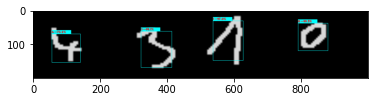

In [19]:
x.start()
app.run()

In [28]:
interpolated(img, dic, 5, width=2)

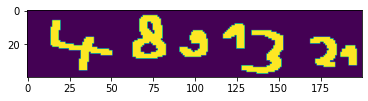

In [29]:
import matplotlib.pyplot as plt 

plt.imshow(img[0, 0].numpy())

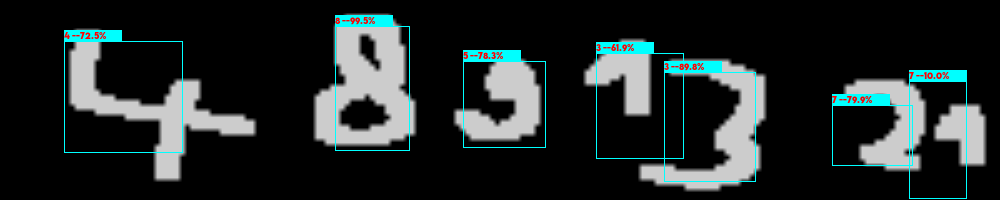

In [26]:
from torchvision import transforms
transforms.ToPILImage()(_)

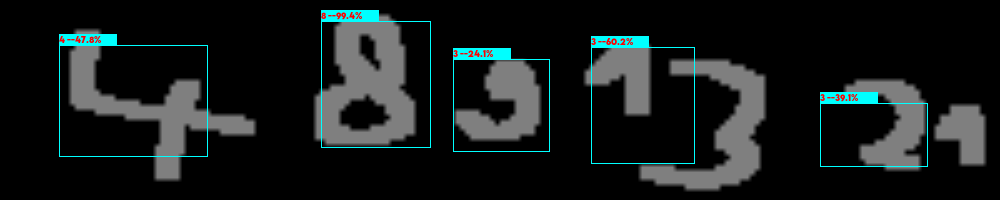

In [32]:
transforms.ToPILImage()(_)